In [1]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc
import pprint

In [2]:
df_train = pd.read_csv('./houseprices/train.csv')
df_test  = pd.read_csv('./houseprices/test.csv')

In [3]:
target_log = np.log1p(df_train['SalePrice'])
target_log.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [4]:
#EDA depending on a type of features

In [5]:
df_train_num = df_train.select_dtypes(include=[np.number])
df_train_obj = df_train.select_dtypes(include=[np.object])

df_test_num = df_test.select_dtypes(include=[np.number])
df_test_obj = df_test.select_dtypes(include=[np.object])

In [6]:
for column in df_train.columns :
    if df_train[column].isnull().sum() :
         print(f'{column} : {df_train[column].isnull().sum() / df_train[column].shape[0]}     {df_train[column].isnull().sum()}')
        

LotFrontage : 0.1773972602739726     259
Alley : 0.9376712328767123     1369
MasVnrType : 0.005479452054794521     8
MasVnrArea : 0.005479452054794521     8
BsmtQual : 0.025342465753424658     37
BsmtCond : 0.025342465753424658     37
BsmtExposure : 0.026027397260273973     38
BsmtFinType1 : 0.025342465753424658     37
BsmtFinType2 : 0.026027397260273973     38
Electrical : 0.0006849315068493151     1
FireplaceQu : 0.4726027397260274     690
GarageType : 0.05547945205479452     81
GarageYrBlt : 0.05547945205479452     81
GarageFinish : 0.05547945205479452     81
GarageQual : 0.05547945205479452     81
GarageCond : 0.05547945205479452     81
PoolQC : 0.9952054794520548     1453
Fence : 0.8075342465753425     1179
MiscFeature : 0.963013698630137     1406


In [7]:
dict_type = {}
for i in df_train.columns :
    if i[0:2] in dict_type :
        dict_type[i[0:2]].append(i)
    else :
        dict_type[i[0:2]]=[i]
pprint.pprint(dict_type)

{'1s': ['1stFlrSF'],
 '2n': ['2ndFlrSF'],
 '3S': ['3SsnPorch'],
 'Al': ['Alley'],
 'Be': ['BedroomAbvGr'],
 'Bl': ['BldgType'],
 'Bs': ['BsmtQual',
        'BsmtCond',
        'BsmtExposure',
        'BsmtFinType1',
        'BsmtFinSF1',
        'BsmtFinType2',
        'BsmtFinSF2',
        'BsmtUnfSF',
        'BsmtFullBath',
        'BsmtHalfBath'],
 'Ce': ['CentralAir'],
 'Co': ['Condition1', 'Condition2'],
 'El': ['Electrical'],
 'En': ['EnclosedPorch'],
 'Ex': ['Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond'],
 'Fe': ['Fence'],
 'Fi': ['Fireplaces', 'FireplaceQu'],
 'Fo': ['Foundation'],
 'Fu': ['FullBath', 'Functional'],
 'Ga': ['GarageType',
        'GarageYrBlt',
        'GarageFinish',
        'GarageCars',
        'GarageArea',
        'GarageQual',
        'GarageCond'],
 'Gr': ['GrLivArea'],
 'Ha': ['HalfBath'],
 'He': ['Heating', 'HeatingQC'],
 'Ho': ['HouseStyle'],
 'Id': ['Id'],
 'Ki': ['KitchenAbvGr', 'KitchenQual'],
 'La': ['LandContour', 'LandSlope'],
 'Lo': ['

In [110]:
'''
연도 
YrSold,YearRemodAdd,YearBuilt,GarageYrBlt
'''
#  (value // 10) * 10
df_train['Year_Sold']=df_train.YrSold.map(lambda x: (x//10)*10)
df_train['Year_RemodAdd']=df_train.YearRemodAdd.map(lambda x: (x//10)*10)
df_train['Year_Built']=df_train.YearBuilt.map(lambda x: (x//10)*10)
df_train['Year_Garage']=df_train.GarageYrBlt.map(lambda x: x if np.isnan(x) else int((x//10)*10)) 

In [111]:
# for i in df_train['GarageYrBlt'][df_train['GarageYrBlt'].isnull()] :
#     print(np.isnan(i))

In [112]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Year_Sold,Year_RemodAdd,Year_Built,Year_Garage
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,2000,2000,2000,2000.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,2000,1970,1970,1970.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,2000,2000,2000,2000.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,2000,1970,1910,1990.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,2000,2000,2000,2000.0


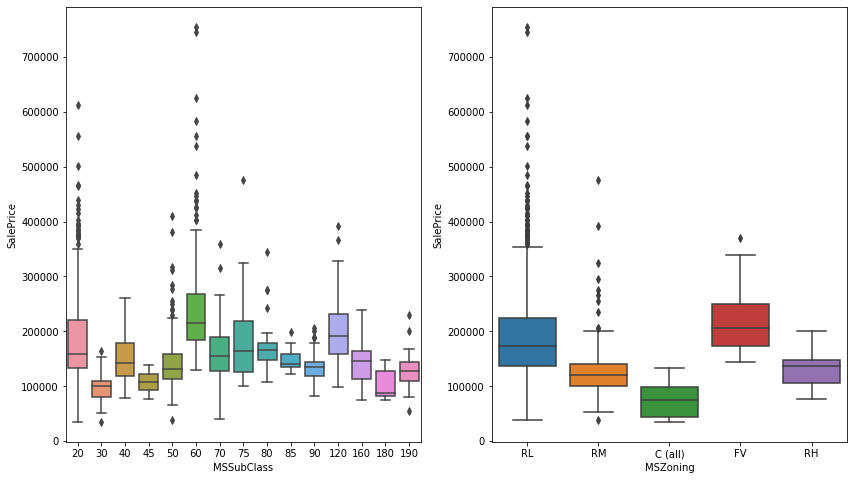

In [8]:
dict_type['MS']
f, ax = plt.subplots(1,2,figsize=(14, 8))
sns.boxplot(x="MSSubClass",y="SalePrice",data=pd.concat([df_train['SalePrice'], df_train['MSSubClass']], axis=1), ax=ax[0])
sns.boxplot(x="MSZoning",y="SalePrice",data=pd.concat([df_train['SalePrice'], df_train['MSZoning']], axis=1), ax=ax[1])

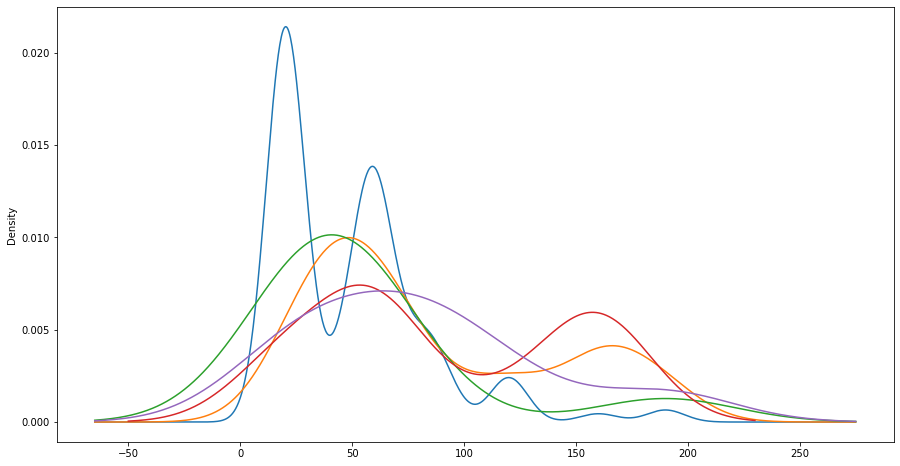

In [9]:
plt.figure(figsize=(15,8))
df_train['MSSubClass'][df_train['MSZoning'] == 'RL'].plot(kind='kde')
df_train['MSSubClass'][df_train['MSZoning'] == 'RM'].plot(kind='kde')
df_train['MSSubClass'][df_train['MSZoning'] == 'C (all)'].plot(kind='kde')
df_train['MSSubClass'][df_train['MSZoning'] == 'FV'].plot(kind='kde')
df_train['MSSubClass'][df_train['MSZoning'] == 'RH'].plot(kind='kde')

#어떤 임팩트를 서로 비교할때 사용.

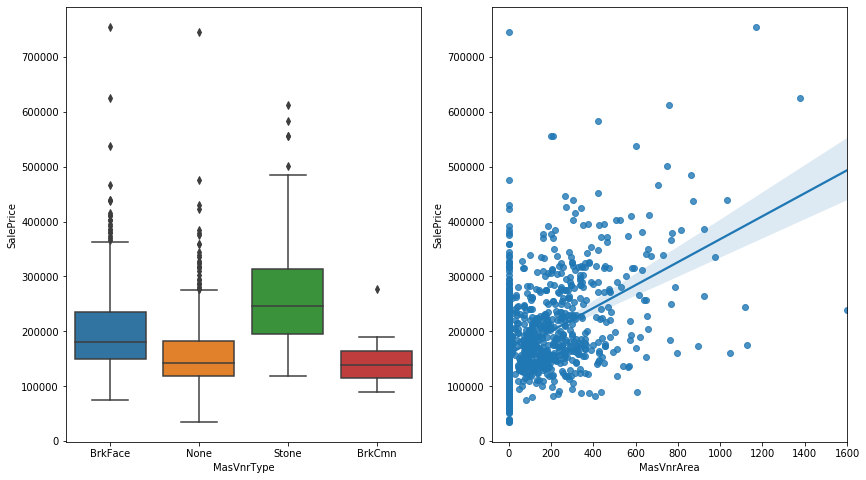

In [10]:
f, ax = plt.subplots(1,2,figsize=(14, 8))
sns.boxplot(x="MasVnrType",y="SalePrice",data=pd.concat([df_train['SalePrice'], df_train['MasVnrType']], axis=1), ax=ax[0])
sns.regplot(x="MasVnrArea",y="SalePrice",data=pd.concat([df_train['SalePrice'], df_train['MasVnrArea']], axis=1),scatter=True,fit_reg=True,ax=ax[1])

In [11]:
print(dict_type['Bs'], dict_type['1s'], dict_type['2n'])

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath'] ['1stFlrSF'] ['2ndFlrSF']


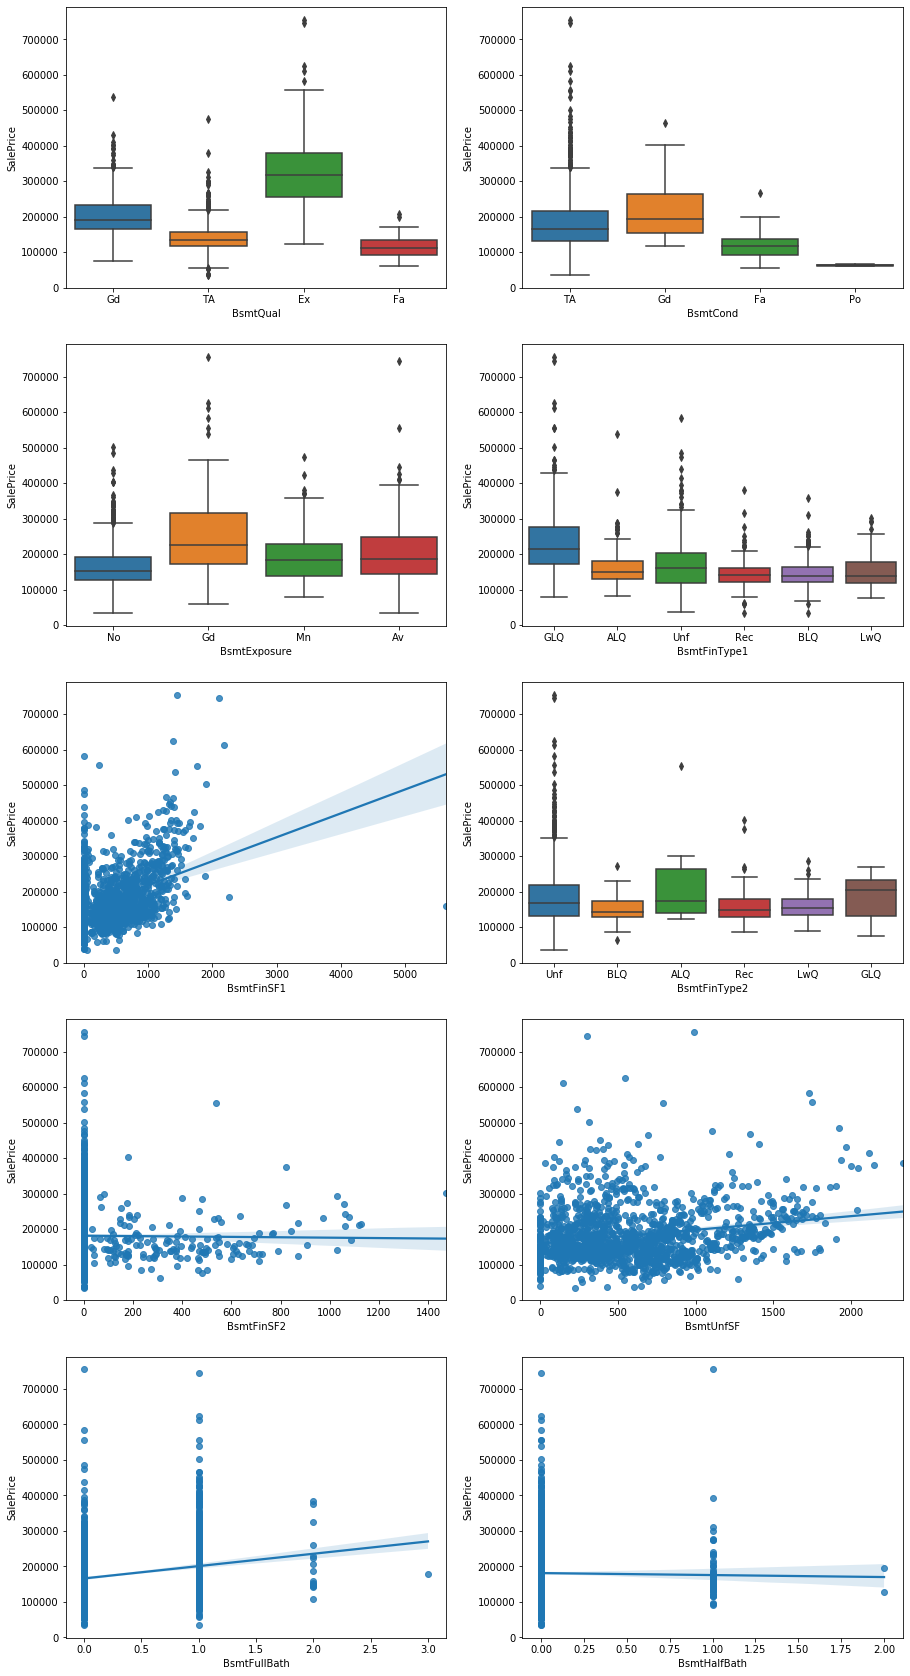

In [12]:
f,ax = plt.subplots(5,2,figsize=(15,30))
for i in range(len(dict_type['Bs'])) :
#     print(f"{df_train[dict_type['Bs'][i]].describe().dtype}")
    if df_train[dict_type['Bs'][i]].describe().dtype == 'object':
        sns.boxplot(x=f"{dict_type['Bs'][i]}",y='SalePrice',data=pd.concat([df_train['SalePrice'], df_train[f"{dict_type['Bs'][i]}"]], axis=1), ax=ax[(i//2),(i%2)])
    else :
        sns.regplot(x=f"{dict_type['Bs'][i]}",y="SalePrice",data=pd.concat([df_train['SalePrice'], df_train[f"{dict_type['Bs'][i]}"]], axis=1),scatter=True,fit_reg=True,ax=ax[(i//2),(i%2)])

In [13]:
#basmQual 와 다른 것들의 관계
#hue는 보통 카테고리형 변수를 넣어서 실수형을 카테고리로 구분하고 싶을 때 사용한다.

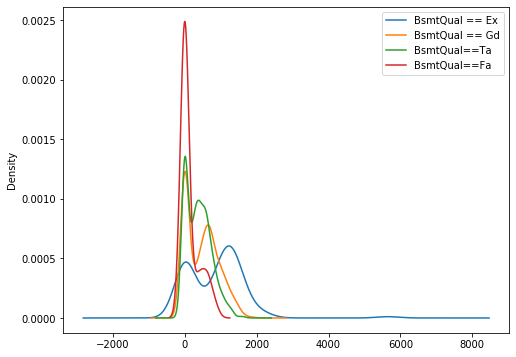

In [14]:
plt.figure(figsize=(8,6))
df_train['BsmtFinSF1'][df_train['BsmtQual']=='Ex'].plot(kind='kde')
df_train['BsmtFinSF1'][df_train['BsmtQual']=='Gd'].plot(kind='kde')
df_train['BsmtFinSF1'][df_train['BsmtQual']=='TA'].plot(kind='kde')
df_train['BsmtFinSF1'][df_train['BsmtQual']=='Fa'].plot(kind='kde')
# df_train['BsmtFinSF1'][df_train['BsmtQual']=='Po'].plot(kind='kde')
# df_train['BsmtFinSF1'][df_train['BsmtQual']=='Na'].plot(kind='kde')
plt.legend(['BsmtQual == Ex', 'BsmtQual == Gd','BsmtQual==Ta','BsmtQual==Fa'])

In [15]:
#fullbath ~~
#그래프 모양이 모두 똑같아서 구별 힘듦.

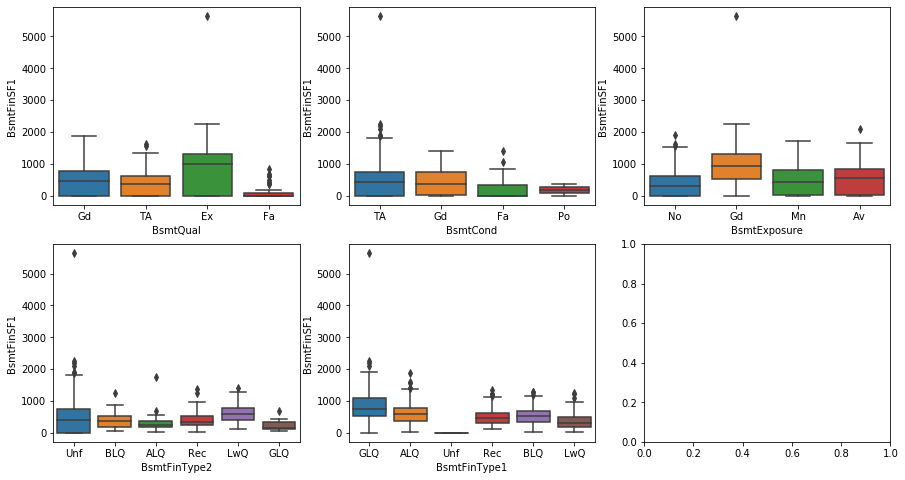

In [16]:
f,ax=plt.subplots(2,3,figsize=(15,8))
sns.boxplot(x="BsmtQual",y="BsmtFinSF1",data=pd.concat([df_train['BsmtQual'], df_train['BsmtFinSF1']], axis=1),ax=ax[0,0])
sns.boxplot(x="BsmtCond",y="BsmtFinSF1",data=pd.concat([df_train['BsmtCond'], df_train['BsmtFinSF1']], axis=1),ax=ax[0,1])
sns.boxplot(x="BsmtExposure",y="BsmtFinSF1",data=pd.concat([df_train['BsmtExposure'], df_train['BsmtFinSF1']], axis=1),ax=ax[0,2])
sns.boxplot(x="BsmtFinType2",y="BsmtFinSF1",data=pd.concat([df_train['BsmtFinType2'], df_train['BsmtFinSF1']], axis=1),ax=ax[1,0])
sns.boxplot(x="BsmtFinType1",y="BsmtFinSF1",data=pd.concat([df_train['BsmtFinType1'], df_train['BsmtFinSF1']], axis=1),ax=ax[1,1])

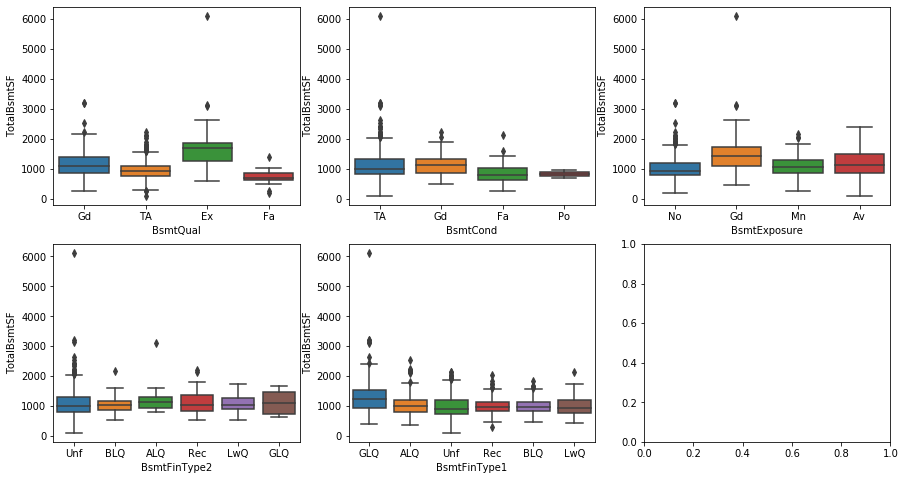

In [17]:
f,ax=plt.subplots(2,3,figsize=(15,8))
sns.boxplot(x="BsmtQual",y="TotalBsmtSF",data=pd.concat([df_train['BsmtQual'], df_train['TotalBsmtSF']], axis=1),ax=ax[0,0])
sns.boxplot(x="BsmtCond",y="TotalBsmtSF",data=pd.concat([df_train['BsmtCond'], df_train['TotalBsmtSF']], axis=1),ax=ax[0,1])
sns.boxplot(x="BsmtExposure",y="TotalBsmtSF",data=pd.concat([df_train['BsmtExposure'], df_train['TotalBsmtSF']], axis=1),ax=ax[0,2])
sns.boxplot(x="BsmtFinType2",y="TotalBsmtSF",data=pd.concat([df_train['BsmtFinType2'], df_train['TotalBsmtSF']], axis=1),ax=ax[1,0])
sns.boxplot(x="BsmtFinType1",y="TotalBsmtSF",data=pd.concat([df_train['BsmtFinType1'], df_train['TotalBsmtSF']], axis=1),ax=ax[1,1])

In [18]:
# df_train.BsmtFinSF1.describe()
#박스플롯 =>? 통계값 이를 통해 연속수를 카테고리형으로 범위를 나눈다.
df_train[['BsmtExposure','TotalBsmtSF']].groupby(['BsmtExposure'],as_index=True).describe()


TotalBsmtSF                                                  \
                   count         mean         std    min     25%     50%   
BsmtExposure                                                               
Av                 221.0  1183.384615  394.130829  105.0   864.0  1144.0   
Gd                 134.0  1460.597015  635.263951  462.0  1083.5  1442.0   
Mn                 114.0  1100.192982  345.184672  264.0   867.0  1058.0   
No                 953.0  1007.598111  340.294214  190.0   780.0   941.0   

                               
                  75%     max  
BsmtExposure                   
Av            1488.00  2396.0  
Gd            1721.25  6110.0  
Mn            1289.25  2158.0  
No            1193.00  3206.0

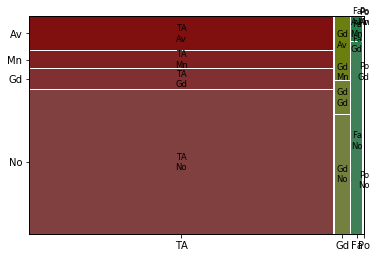

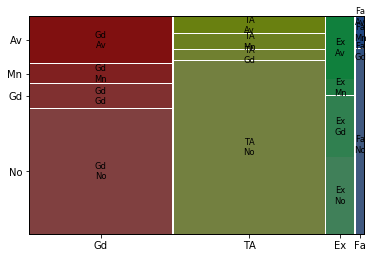

          OverallQual
BsmtQual             
Ex           7.335443
Fa           4.885714
Gd           6.660194
TA           5.329738          OverallQual                                              
               count      mean       std  min  25%  50%  75%   max
BsmtCond                                                          
Fa              45.0  5.066667  1.232145  2.0  4.0  5.0  6.0   8.0
Gd              65.0  6.723077  1.268706  4.0  6.0  7.0  8.0  10.0
Po               2.0  3.000000  2.828427  1.0  2.0  3.0  4.0   5.0
TA            1311.0  6.159420  1.340981  2.0  5.0  6.0  7.0  10.0               OverallQual
BsmtExposure             
Av               6.570136
Gd               6.962687
Mn               6.254386
No               5.919203              TotalBsmtSF                                                  \
                   count         mean         std    min     25%     50%   
BsmtFinType1                                                               
ALQ            

In [156]:
values_1 = df_train[['BsmtQual','OverallQual']].groupby(['BsmtQual'],as_index=True).mean()
values_2 = df_train[['BsmtCond','OverallQual']].groupby(['BsmtCond'],as_index=True).describe()
#overallqual
from statsmodels.graphics.mosaicplot import mosaic
# df_train.sort_values('BsmtQual')
a=mosaic(df_train_obj,['BsmtCond','BsmtExposure'])
b=mosaic(df_train_obj,['BsmtQual','BsmtExposure'])
plt.show(a,b)
#expousre 는 qual과 cond에 no에 대한 분포를 더 많이 가지고 있다.
#expousre이 SF1에서 Gd가 평균이 높은 값을 가지고 있다.

values_3 = df_train[['BsmtExposure','OverallQual']].groupby(['BsmtExposure'],as_index=True).mean()
values_4 = df_train[['BsmtFinType1','TotalBsmtSF']].groupby(['BsmtFinType1'],as_index=True).describe()
values_5 = df_train[['BsmtFinType2','TotalBsmtSF']].groupby(['BsmtFinType2'],as_index=True).describe()
print(values_1,values_2,values_3,values_4,values_5)

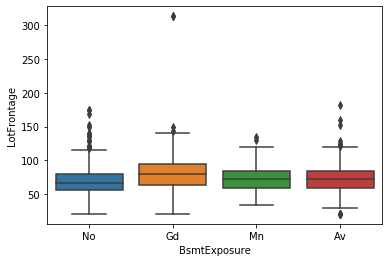

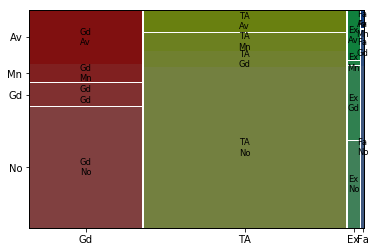

In [177]:
sns.boxplot(x="BsmtExposure",y="LotFrontage",data=pd.concat([df_train['BsmtExposure'], df_train['LotFrontage']], axis=1))
a=mosaic(df_train_obj,['ExterQual','BsmtExposure'])

In [167]:
df_train.loc[(df_train['BsmtQual'].isnull()) & (df_train['OverallQual'] >= int(values_1.loc['Ex'].OverallQual)), 'BsmtQual'] = 'Ex'
df_train.loc[(df_train['BsmtQual'].isnull()) & ((df_train['OverallQual'] >= int(values_1.loc['Gd'].OverallQual))&(df_train['OverallQual'] < int(values_1.loc['Ex'].OverallQual))), 'BsmtQual'] = 'Gd'
df_train.loc[(df_train['BsmtQual'].isnull()) & ((df_train['OverallQual'] >= int(values_1.loc['TA'].OverallQual))&(df_train['OverallQual'] < int(values_1.loc['Gd'].OverallQual))), 'BsmtQual'] = 'TA'
df_train.loc[(df_train['BsmtQual'].isnull()) & ((df_train['OverallQual'] < int(values_1.loc['TA'].OverallQual))), 'BsmtQual'] = 'Fa'

df_train.loc[(df_train['BsmtCond'].isnull()) & (df_train['OverallQual'] >= round(values_2.loc['Gd'].OverallQual['mean'])), 'BsmtCond'] = 'Gd'
df_train.loc[(df_train['BsmtCond'].isnull()) & ((df_train['OverallQual'] >= round(values_2.loc['TA'].OverallQual['mean']))&(df_train['OverallQual'] < round(values_2.loc['Gd'].OverallQual['mean']))), 'BsmtCond'] = 'Gd'
df_train.loc[(df_train['BsmtCond'].isnull()) & ((df_train['OverallQual'] >= round(values_2.loc['Fa'].OverallQual['mean']))&(df_train['OverallQual'] < round(values_2.loc['TA'].OverallQual['mean']))), 'BsmtCond'] = 'TA'
df_train.loc[(df_train['BsmtCond'].isnull()) & ((df_train['OverallQual'] < round(values_2.loc['Fa'].OverallQual['mean']))), 'BsmtCond'] = 'Fa'

In [168]:
df_train.BsmtCond.isnull().sum()

0

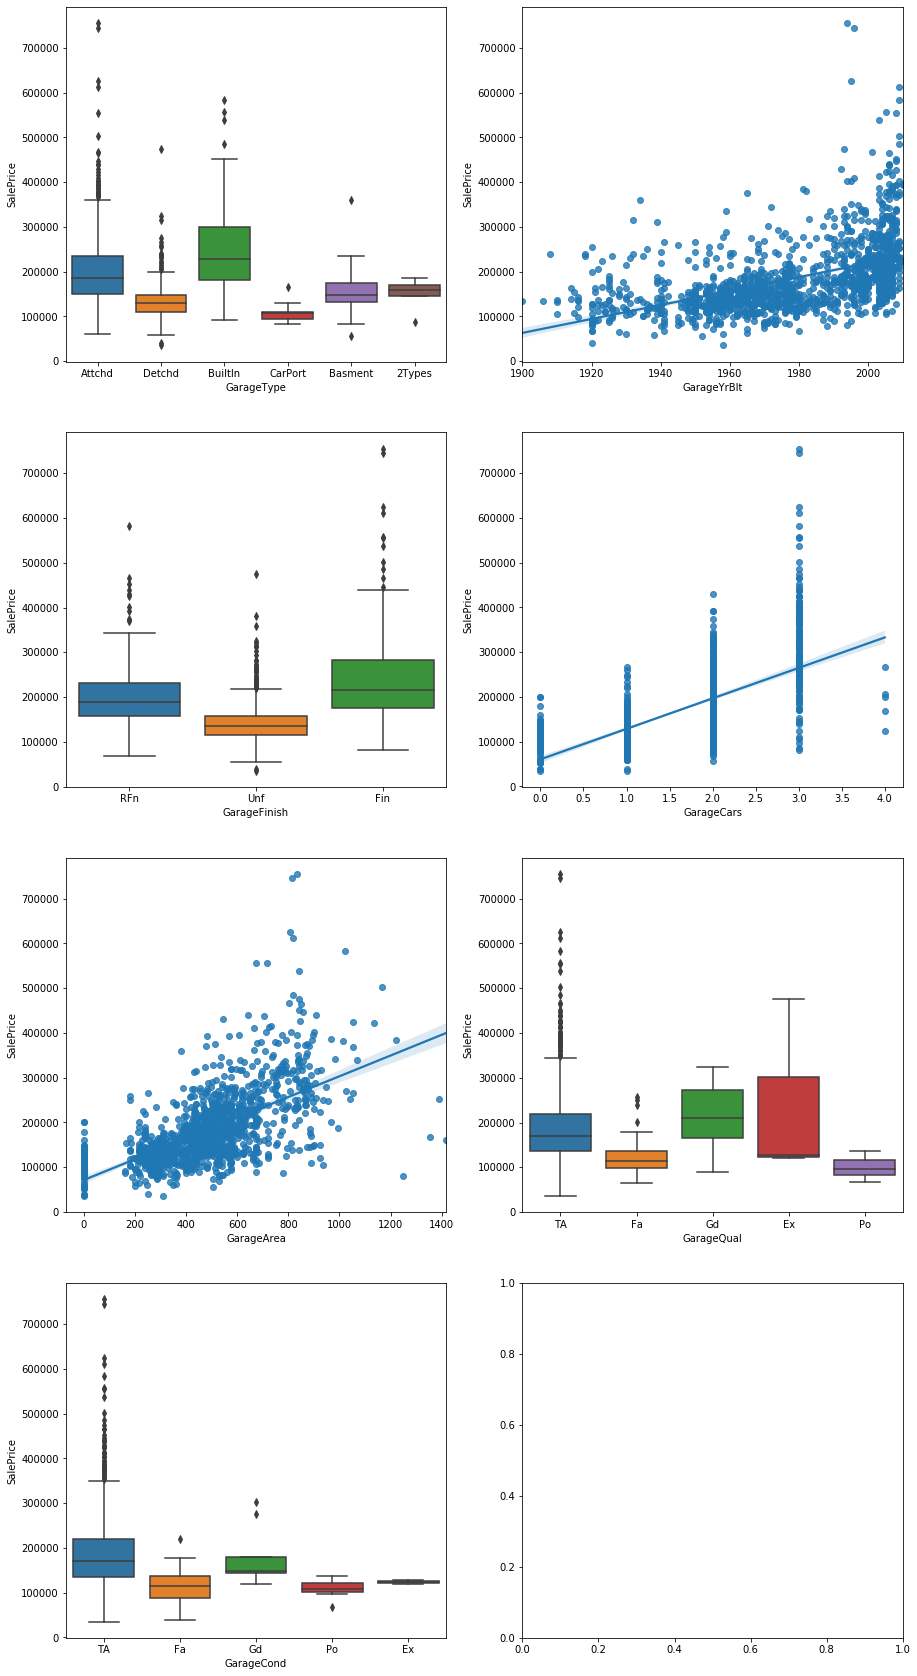

In [21]:
f,ax = plt.subplots(4,2,figsize=(15,30))
for i in range(len(dict_type['Ga'])) :
#     print(f"{df_train[dict_type['Bs'][i]].describe().dtype}")
    if df_train[dict_type['Ga'][i]].describe().dtype == 'object':
        sns.boxplot(x=f"{dict_type['Ga'][i]}",y='SalePrice',data=pd.concat([df_train['SalePrice'], df_train[f"{dict_type['Ga'][i]}"]], axis=1), ax=ax[(i//2),(i%2)])
    else :
        sns.regplot(x=f"{dict_type['Ga'][i]}",y="SalePrice",data=pd.concat([df_train['SalePrice'], df_train[f"{dict_type['Ga'][i]}"]], axis=1),scatter=True,fit_reg=True,ax=ax[(i//2),(i%2)])

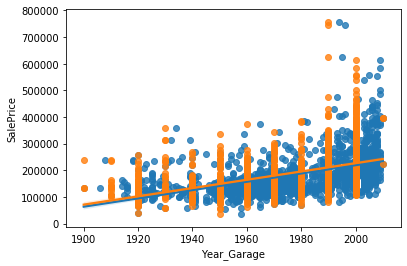

In [115]:
sns.regplot(x="GarageYrBlt",y="SalePrice",data=pd.concat([df_train['GarageYrBlt'], df_train['SalePrice']], axis=1),scatter=True,fit_reg=True)
sns.regplot(x="Year_Garage",y="SalePrice",data=pd.concat([df_train['Year_Garage'], df_train['SalePrice']], axis=1),scatter=True,fit_reg=True)

In [116]:
'''
GarageType : 0.05547945205479452     81
GarageYrBlt : 0.05547945205479452     81
GarageFinish : 0.05547945205479452     81
GarageQual : 0.05547945205479452     81
GarageCond : 0.05547945205479452     81
'''
values_1 = df_train[['GarageType','GarageArea']].groupby(['GarageType'],as_index=True).describe()
values_2 = df_train[['Year_Garage','OverallQual']].groupby(['Year_Garage'],as_index=True).describe()
print(values_1,values_2)

           GarageArea                                                        \
                count        mean         std    min     25%    50%     75%   
GarageType                                                                    
2Types            6.0  919.500000  232.644579  750.0  769.25  825.0  964.00   
Attchd          870.0  524.587356  177.871758  164.0  420.00  500.0  604.75   
Basment          19.0  441.210526  118.083106  240.0  364.00  450.0  525.00   
BuiltIn          88.0  579.590909  194.082139  208.0  421.50  553.0  699.50   
CarPort           9.0  451.333333  110.981981  288.0  400.00  462.0  516.00   
Detchd          387.0  426.857881  175.011837  160.0  280.00  400.0  539.00   

                    
               max  
GarageType          
2Types      1356.0  
Attchd      1418.0  
Basment      672.0  
BuiltIn     1052.0  
CarPort      596.0  
Detchd      1248.0               OverallQual                                               
                  count     

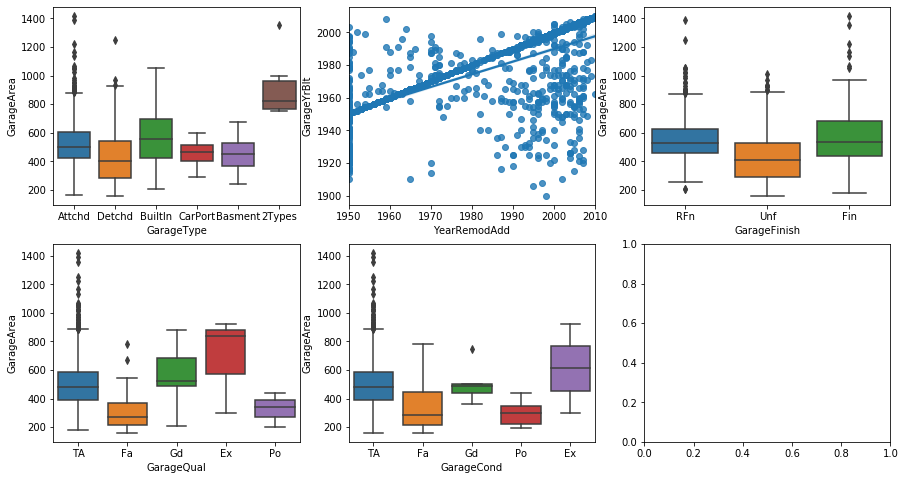

In [23]:
f,ax=plt.subplots(2,3,figsize=(15,8))
sns.boxplot(x="GarageType",y="GarageArea",data=pd.concat([df_train['GarageType'], df_train['GarageArea']], axis=1),ax=ax[0,0])
sns.regplot(x="YearRemodAdd",y="GarageYrBlt",data=pd.concat([df_train['YearRemodAdd'], df_train['GarageYrBlt']], axis=1),scatter=True,fit_reg=True,ax=ax[0,1])
sns.boxplot(x="GarageFinish",y="GarageArea",data=pd.concat([df_train['GarageFinish'], df_train['GarageArea']], axis=1),ax=ax[0,2])
sns.boxplot(x="GarageQual",y="GarageArea",data=pd.concat([df_train['GarageQual'], df_train['GarageArea']], axis=1),ax=ax[1,0])
sns.boxplot(x="GarageCond",y="GarageArea",data=pd.concat([df_train['GarageCond'], df_train['GarageArea']], axis=1),ax=ax[1,1])

#year는 10년 단위씩 나눠서 범위를 정하고 추이를 본다.

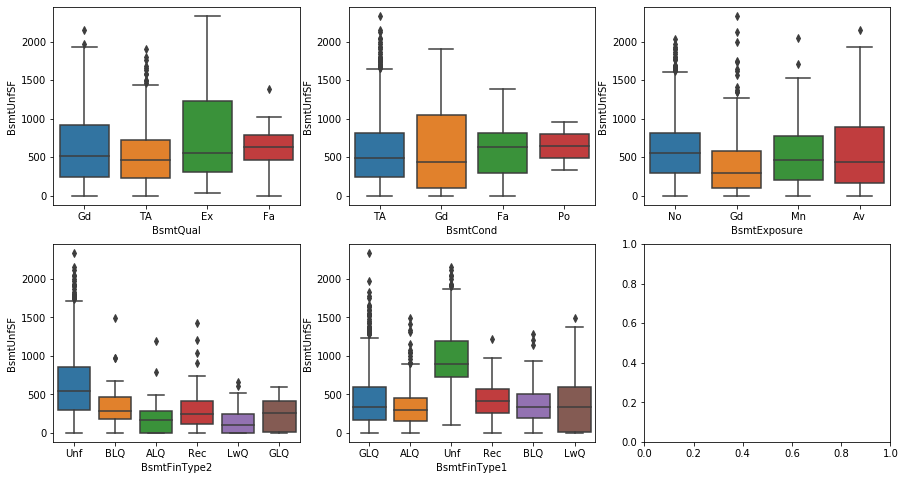

In [24]:
f,ax=plt.subplots(2,3,figsize=(15,8))
sns.boxplot(x="BsmtQual",y="BsmtUnfSF",data=pd.concat([df_train['BsmtQual'], df_train['BsmtUnfSF']], axis=1),ax=ax[0,0])
sns.boxplot(x="BsmtCond",y="BsmtUnfSF",data=pd.concat([df_train['BsmtCond'], df_train['BsmtUnfSF']], axis=1),ax=ax[0,1])
sns.boxplot(x="BsmtExposure",y="BsmtUnfSF",data=pd.concat([df_train['BsmtExposure'], df_train['BsmtUnfSF']], axis=1),ax=ax[0,2])
sns.boxplot(x="BsmtFinType2",y="BsmtUnfSF",data=pd.concat([df_train['BsmtFinType2'], df_train['BsmtUnfSF']], axis=1),ax=ax[1,0])
sns.boxplot(x="BsmtFinType1",y="BsmtUnfSF",data=pd.concat([df_train['BsmtFinType1'], df_train['BsmtUnfSF']], axis=1),ax=ax[1,1])

In [25]:
'''
categorical - categorical : 교차테이블 / 모자이크플롯
numeric - categorical : 카테고리별 통계값 / 박스 플롯
numeric - numeric : 상관계수 / 산점도
'''

'\ncategorical - categorical : 교차테이블 / 모자이크플롯\nnumeric - categorical : 카테고리별 통계값 / 박스 플롯\nnumeric - numeric : 상관계수 / 산점도\n'

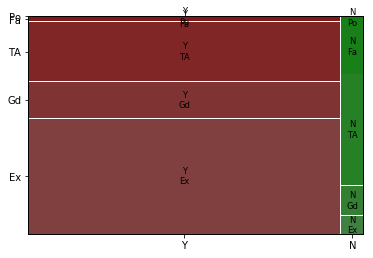

In [26]:
a=mosaic(df_train_obj,['CentralAir','HeatingQC'])
#air가 있으면 heating sys이 EX가 많은 편. 
#NO면 FA가 많은 편.

SalePrice                                                     \
                  count           mean            std       min        25%   
SaleCondition                                                                
Abnorml           101.0  146526.623762   82796.213395   34900.0  104000.00   
AdjLand             4.0  104125.000000   26135.464411   81000.0   81750.00   
Alloca             12.0  167377.416667   84460.527502   55993.0  116383.25   
Family             20.0  149600.000000   47820.002421   82500.0  115500.00   
Normal           1198.0  175202.219533   69713.636280   39300.0  130000.00   
Partial           125.0  272291.752000  103696.404119  113000.0  193879.00   

                                             
                    50%       75%       max  
SaleCondition                                
Abnorml        130000.0  172500.0  745000.0  
AdjLand        104000.0  126375.0  127500.0  
Alloca         148145.0  202043.0  359100.0  
Family         140500.0  170250.0  259000.0  
Normal         160000.0  205000.0  755000.0  
Partial        244600.0  339750.0  611657.0

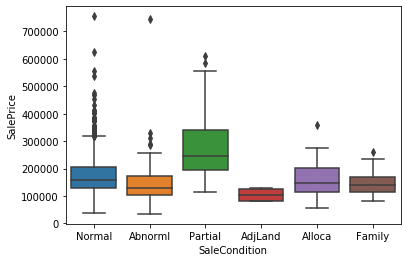

In [27]:
sns.boxplot(x="SaleCondition",y="SalePrice",data=pd.concat([df_train['SaleCondition'], df_train['SalePrice']], axis=1))
df_train[['SaleCondition','SalePrice']].groupby(['SaleCondition'],as_index=True).describe()

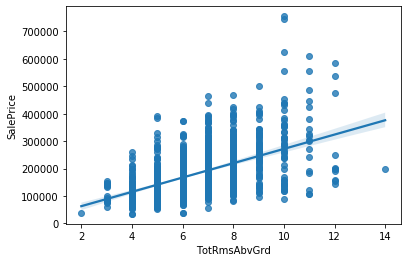

In [40]:
df_train[['TotRmsAbvGrd','SalePrice']].groupby(['TotRmsAbvGrd'],as_index=True).describe()
sns.regplot(x="TotRmsAbvGrd",y="SalePrice",data=pd.concat([df_train['TotRmsAbvGrd'], df_train['SalePrice']], axis=1), scatter=True, fit_reg=1)

In [28]:
print(df_train['BsmtQual'].loc[df_train['BsmtQual'].isnull()].index)
print(df_train['BsmtCond'].loc[df_train['BsmtCond'].isnull()].index)
print(df_train['BsmtFinType1'].loc[df_train['BsmtFinType1'].isnull()].index)
print(df_train['BsmtFinType2'].loc[df_train['BsmtFinType2'].isnull()].index) #332
print(df_train['BsmtExposure'].loc[df_train['BsmtExposure'].isnull()].index)#948
#외 다섯개의 피처는 모두 null이 동일.


Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')
Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')
Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')
Int64Index([  17,   39,   90,  102,  156,  182,  259,  332,  342,  362,  371,
             392,  520,  532,  

In [29]:
#null 위치 모두 동일.
print(df_train['GarageType'].loc[df_train['GarageType'].isnull()].index)
print(df_train['GarageYrBlt'].loc[df_train['GarageYrBlt'].isnull()].index)
print(df_train['GarageFinish'].loc[df_train['GarageFinish'].isnull()].index)
print(df_train['GarageQual'].loc[df_train['GarageQual'].isnull()].index) 
print(df_train['GarageCond'].loc[df_train['GarageCond'].isnull()].index)

Int64Index([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
             155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
             386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
             562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
             738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
             976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
            1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
            1407, 1449, 1450, 1453],
           dtype='int64')
Int64Index([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
             155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
             386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
             562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
             738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
 